# Search Umbra SAR Archive

Do any of the recent acquisitions have uint16 radiometric processing?


In [1]:
import geopandas as gpd
import pandas as pd
import pystac_client
import os
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
pd.Timestamp.now()

Timestamp('2025-03-15 09:50:12.351173')

In [3]:
# Search for acquisitions in AWS Open Data Catalog
# NOTE: different endpoint, but still need auth
stac_api_url = "https://api.canopy.umbra.space/archive/"
archive = pystac_client.Client.open(stac_api_url,
                                    headers={"authorization": f"Bearer {os.environ.get('UMBRA_API_TOKEN')}" }
)

In [4]:
limit_results=2000

cql2filter = {
    "op": "=",
    "args": [
      {
        "property": "umbra:open-data-catalog"
      },
      True
    ]
  }

stac_search = archive.search(
    #bbox='-180,-90,180,90',
    # Limit to just CONUS
    bbox='-124.84, 24.39, -66.88, 49.38', #CONUS
    datetime=['2025-01-01', None],
    max_items=limit_results,
    limit=limit_results,
    collections=["umbra-sar"],
    filter=cql2filter,
)
items = stac_search.item_collection()
gf = gpd.GeoDataFrame.from_features(items.to_dict(), crs='EPSG:4326')


In [5]:
# Is new data still showing up in public archive?
# Yes. Most recent addition from 4 days ago
print(gf.start_datetime.min(), gf.start_datetime.max())

2025-01-09T03:14:09+00:00 2025-03-11T05:30:19Z


In [6]:
len(gf)

178

In [7]:
gf.iloc[0]

geometry                                    POLYGON Z ((-110.81721770241953 43.71117668695...
id                                                       22f7d627-50b4-450e-b82d-99e458e12709
created                                                           2025-03-11T14:07:44.534339Z
updated                                                           2025-03-11T14:07:44.534342Z
datetime                                                          2025-03-11T05:30:20.217362Z
platform                                                                             Umbra-08
end_datetime                                                      2025-03-11T05:30:21.434725Z
umbra:task_id                                            2ce8bba8-0dea-4541-a555-3af384594081
start_datetime                                                           2025-03-11T05:30:19Z
sar:product_type                                                                          GEC
sar:looks_azimuth                                           

In [8]:
gf.head()

,geometry,id,created,updated,datetime,platform,end_datetime,umbra:task_id,start_datetime,sar:product_type,...,view:incidence_angle,sar:resolution_azimuth,umbra:open-data-catalog,umbra:squint_angle_degrees,umbra:grazing_angle_degrees,umbra:slant_range_kilometers,umbra:target_azimuth_angle_degrees,umbra:squint_angle_engineering_degrees,umbra:squint_angle_exploitation_degrees,umbra:squint_angle_degrees_off_broadside
0,"POLYGON Z ((-110.81722 43.71118 4146.31822, -1...",22f7d627-50b4-450e-b82d-99e458e12709,2025-03-11T14:07:44.534339Z,2025-03-11T14:07:44.534342Z,2025-03-11T05:30:20.217362Z,Umbra-08,2025-03-11T05:30:21.434725Z,2ce8bba8-0dea-4541-a555-3af384594081,2025-03-11T05:30:19Z,GEC,...,23.817375,0.500,True,15.703285,66.182625,533.740051,242.974609,74.296715,15.703285,15.703285
1,"POLYGON Z ((-105.12105 39.53531 1721.23512, -1...",a256a1c0-c629-40be-9173-120509e48bc9,2025-03-10T07:54:33.192201Z,2025-03-10T07:54:33.192206Z,2025-03-10T05:35:25.722350Z,Umbra-09,2025-03-10T05:35:29.444700Z,d36de69e-648c-495c-b5ac-4e8b42265beb,2025-03-10T05:35:22Z,GEC,...,42.929226,0.250,True,29.596132,47.070774,749.598450,230.254700,60.403866,29.596134,29.596134
2,"POLYGON Z ((-119.46111 39.51761 1386.45181, -1...",88128991-9ec1-4462-9a42-371389e7d7f7,2025-03-11T00:25:23.114703Z,2025-03-11T00:25:23.114706Z,2025-03-09T06:16:28.991615Z,Umbra-08,2025-03-09T06:16:34.983230Z,bbf976e6-fc2f-45ce-ab19-18b1eeed48e2,2025-03-09T06:16:23Z,GEC,...,41.470203,0.125,True,19.254074,48.529797,641.899292,240.893082,70.745926,19.254074,19.254074
3,"POLYGON Z ((-105.12352 39.53565 1721.23503, -1...",cc5b6868-b4bd-45ae-822b-e2203552c780,2025-03-09T09:43:42.272449Z,2025-03-09T09:43:42.272453Z,2025-03-09T05:35:54.600191Z,Umbra-10,2025-03-09T05:35:58.200382Z,5f62bb80-e746-46de-8ec8-761244afc295,2025-03-09T05:35:51Z,GEC,...,42.818123,0.250,True,26.211216,47.181877,747.941528,233.744781,63.788784,26.211216,26.211216
4,"POLYGON Z ((-121.75634 38.55499 -9.90204, -121...",50a7b62d-fa5c-4352-961c-7ccc8f52405f,2025-03-11T08:17:36.907052Z,2025-03-11T08:17:36.907055Z,2025-03-08T17:32:19.365082Z,Umbra-05,2025-03-08T17:32:24.730163Z,e36927d4-c5df-4ee3-a588-444cd0328499,2025-03-08T17:32:14Z,GEC,...,32.650272,0.125,True,19.981419,57.349728,566.976746,80.350212,70.018585,19.981415,19.981415


In [9]:
# Group into intersecting acquitions
polygon_groups = gpd.GeoDataFrame(geometry=[gf.union_all()], crs='EPSG:4326'
                                  ).explode().reset_index(drop=True)
polygon_groups

# Now 'index_right' is the polygon group index
# keep copy of original index by calling .reset_index on the result
gf_with_labels = gpd.sjoin(gf, polygon_groups, how='left').reset_index()

# Retain only metadata from the first task in each polygon group
# NOTE: if we don't care about one medata record we can just use polygon_groups!
subset = gf_with_labels.dissolve(by='index_right', aggfunc='first')
len(subset)

25

In [10]:
# Save a bunch of geojsons
# Do place name lookup? or just save by group number (but those will change...)

In [11]:
subset['count'] = gf_with_labels.groupby('index_right')['id'].count()

In [12]:
subset['count'].describe()

count    25.000000
mean      7.120000
std       4.126338
min       1.000000
25%       2.000000
50%       9.000000
75%      10.000000
max      14.000000
Name: count, dtype: float64

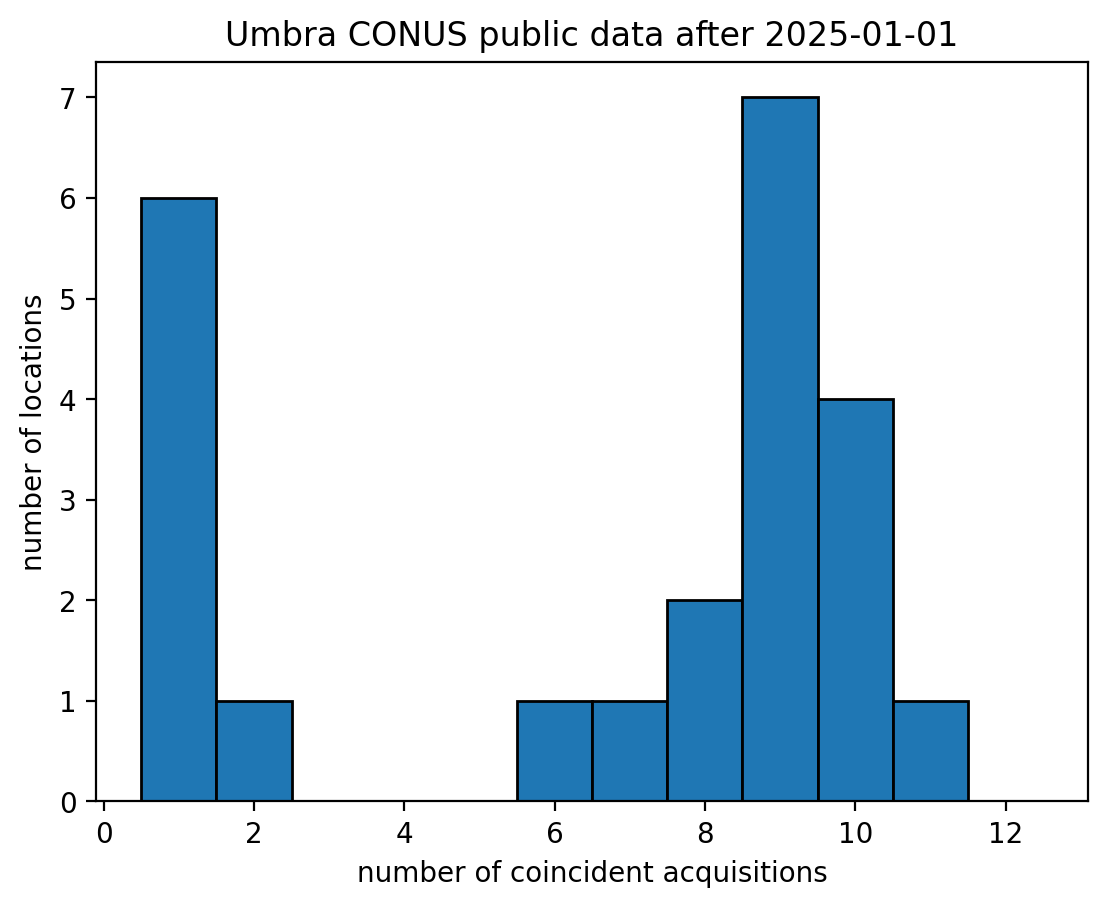

In [13]:
subset['count'].plot.hist(bins=np.arange(1, subset['count'].max(), 1)-0.5, edgecolor='black')
plt.ylabel('number of locations')
plt.xlabel('number of coincident acquisitions')
plt.title('Umbra CONUS public data after 2025-01-01');

In [14]:
# Where are locations of acquisitions>5
timeseries = subset[subset['count']>5] # index is still index_right
#timeseries.explore(column='count', popup=True, cmap='plasma')

In [15]:
summary = timeseries[['geometry','count']]
summary.head()

,geometry,count
index_right,,
0,"POLYGON Z ((-118.20867 33.76815 -35.25525, -11...",9
1,"POLYGON Z ((-119.69241 37.96833 1296.42836, -1...",10
2,"POLYGON Z ((-121.75613 38.55483 -9.90195, -121...",9
3,"POLYGON Z ((-119.41759 39.57063 1386.45079, -1...",9
5,"POLYGON Z ((-115.14164 36.07766 622.57551, -11...",8


In [16]:
# https://docs.canopy.umbra.space/docs/archive-catalog-searching-via-stac-api#finding-data-in-the-umbra-open-data-s3-bucket
columns = ['start_datetime','view:incidence_angle','umbra:target_azimuth_angle_degrees','umbra:squint_angle_exploitation_degrees','sar:resolution_range','sar:resolution_azimuth','id','umbra:task_id']
summary = summary.join(gf_with_labels.groupby('index_right')[columns].agg(list))
# TODO: string representations for easier viewing?
summary.head()

,geometry,count,start_datetime,view:incidence_angle,umbra:target_azimuth_angle_degrees,umbra:squint_angle_exploitation_degrees,sar:resolution_range,sar:resolution_azimuth,id,umbra:task_id
index_right,,,,,,,,,,
0,"POLYGON Z ((-118.20867 33.76815 -35.25525, -11...",9,"[2025-03-08T04:29:51Z, 2025-02-22T05:40:28+00:...","[43.25238800048828, 44.09334182739258, 26.4556...","[94.92071533203125, 95.19187927246094, 239.670...","[19.27838897705078, 19.69953155517578, 19.5843...","[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.3...","[0.175, 0.175, 0.175, 0.175, 0.175, 0.175, 0.1...","[ab182aef-7a7c-486d-9749-2bd12bce1d37, c761c0f...","[0fad1b55-c3bc-46e7-ade5-18361a2cebbb, 28ae573..."
1,"POLYGON Z ((-119.69241 37.96833 1296.42836, -1...",10,"[2025-03-07T18:32:05Z, 2025-03-04T04:39:02Z, 2...","[39.291778564453125, 27.886672973632812, 44.44...","[116.22792053222656, 89.30911254882812, 91.969...","[-16.2525634765625, 13.229576110839844, 17.294...","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...","[db82b5ef-e12b-4166-918f-e3550c707315, 9a21e9f...","[9a4daef2-c729-4ec0-a094-3f58072287fb, ae1ead3..."
2,"POLYGON Z ((-121.75613 38.55483 -9.90195, -121...",9,"[2025-03-08T17:32:14Z, 2025-03-04T18:53:43Z, 2...","[32.650272369384766, 39.94342041015625, 38.310...","[80.35021209716797, 94.38145446777344, 264.933...","[19.981414794921875, 5.388877868652344, -4.746...","[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2...","[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.1...","[50a7b62d-fa5c-4352-961c-7ccc8f52405f, c7bd014...","[e36927d4-c5df-4ee3-a588-444cd0328499, 14497a7..."
3,"POLYGON Z ((-119.41759 39.57063 1386.45079, -1...",9,"[2025-03-09T06:16:23Z, 2025-03-05T06:15:54Z, 2...","[41.4702033996582, 38.6152458190918, 42.973602...","[240.89308166503906, 257.77008056640625, 305.2...","[19.254074096679688, 2.3896484375, 19.93743896...","[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2...","[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.1...","[88128991-9ec1-4462-9a42-371389e7d7f7, cc4965d...","[bbf976e6-fc2f-45ce-ab19-18b1eeed48e2, 230209c..."
5,"POLYGON Z ((-115.14164 36.07766 622.57551, -11...",8,"[2025-03-07T05:28:25Z, 2025-03-04T05:37:48Z, 2...","[40.45005416870117, 44.9490852355957, 42.33915...","[95.20376586914062, 92.44194793701172, 94.1263...","[19.779403686523438, 18.23480224609375, 19.641...","[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]","[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.1...","[024a0d12-4209-4bcb-a2f8-323199f07f76, 955ac0b...","[9a3570d4-187d-4514-b96b-1c089631a1b1, e99fcbb..."


In [17]:
summary.explore(column='count', popup=True, cmap='magma')

In [19]:
summary.to_file('recent_timeseries_conus.geojson')